In [1]:
# scatter plot of the circles dataset with points colored by class
from sklearn.datasets import make_circles
from numpy import where
from matplotlib import pyplot
# generate circles
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split,StratifiedKFold
import tensorflow as tf
from tensorflow import keras
from sklearn.linear_model import LogisticRegression

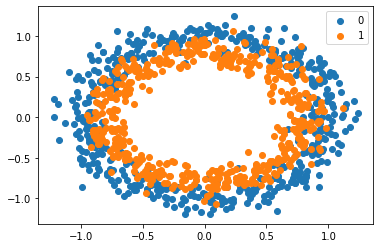

In [2]:
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# select indices of points with each class label
for i in range(2):
	samples_ix = where(y == i)
	pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
pyplot.legend()
pyplot.show()

In [3]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y)

## Logistico

In [4]:
model_l = keras.Sequential([
      keras.layers.InputLayer(input_shape=(2)),                      
      keras.layers.Flatten(),
      keras.layers.Dense(1, activation='sigmoid')
  ])
model_l.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2)                 0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [5]:
model_l.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_l.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=500,verbose=0)
test_loss_l, test_acc_l = model_l.evaluate(x=x_test,y= y_test, verbose=2)

7/7 - 0s - loss: 0.6944 - accuracy: 0.4700


In [6]:
test_acc_l

0.4699999988079071

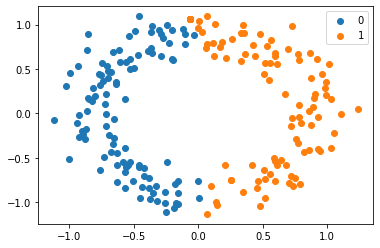

In [7]:
X= x_test
y = (model_l.predict(x_test)>0.5)*1
# select indices of points with each class label
for i in range(2):
	samples_ix = where(y == i)
	pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
pyplot.legend()
pyplot.show()

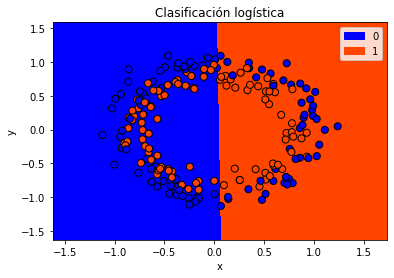

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

mesh_step_size = .01  # step size in the mesh
plot_symbol_size = 50
cmap_light = ListedColormap(['#0000FF', '#FF4500'])#, '#AAAAFF','#AFAFAF'])
cmap_bold  = ListedColormap(['#0000FF', '#FF4500'])#, '#0000FF','#AFAFAF'])
X_mat=x_test
y_mat=y_test
x_min, x_max = X_mat[:, 0].min() - 0.5, X_mat[:, 0].max() + 0.5
y_min, y_max = X_mat[:, 1].min() - 0.5, X_mat[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                      np.arange(y_min, y_max, mesh_step_size))
Z = model_l.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot training points
plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y_mat, cmap=cmap_bold, edgecolor = 'black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
patch0 = mpatches.Patch(color='#0000FF', label='0')
patch1 = mpatches.Patch(color='#FF4500', label='1')
plt.legend(handles=[patch0, patch1])
plt.xlabel('x')
plt.ylabel('y')
plt.title("Clasificación logística")
plt.show()

## FC

In [9]:
model_fc = keras.Sequential([
      keras.layers.InputLayer(input_shape=(2)),                      
      keras.layers.Flatten(),
      keras.layers.Dense(32, activation='relu'),
      keras.layers.Dense(1, activation='sigmoid')
  ])
model_fc.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [10]:
#FC
model_fc = keras.Sequential([
    keras.layers.InputLayer(input_shape=(2)),                      
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model_fc.compile(optimizer=keras.optimizers.SGD(lr=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_fc.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=500,verbose=0)
test_loss_fc, test_acc_fc = model_fc.evaluate(x=x_test,y= y_test, verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


7/7 - 0s - loss: 0.5321 - accuracy: 0.8150


In [11]:
test_acc_fc

0.8149999976158142

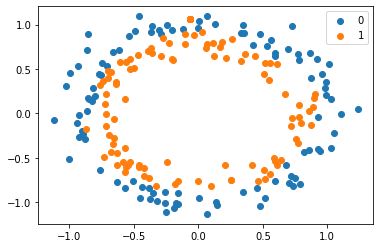

In [12]:
X= x_test
y = (model_fc.predict(x_test)>0.5)*1
# select indices of points with each class label
for i in range(2):
	samples_ix = where(y == i)
	pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
pyplot.legend()
pyplot.show()

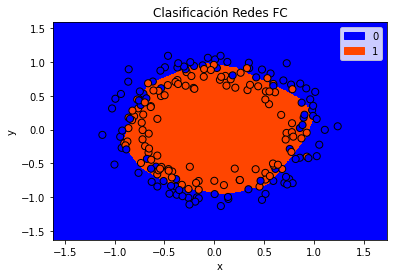

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

mesh_step_size = .01  # step size in the mesh
plot_symbol_size = 50
cmap_light = ListedColormap(['#0000FF', '#FF4500'])#, '#AAAAFF','#AFAFAF'])
cmap_bold  = ListedColormap(['#0000FF', '#FF4500'])#, '#0000FF','#AFAFAF'])
X_mat=x_test
y_mat=y_test
x_min, x_max = X_mat[:, 0].min() - 0.5, X_mat[:, 0].max() + 0.5
y_min, y_max = X_mat[:, 1].min() - 0.5, X_mat[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                      np.arange(y_min, y_max, mesh_step_size))
Z = model_fc.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot training points
plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y_mat, cmap=cmap_bold, edgecolor = 'black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
patch0 = mpatches.Patch(color='#0000FF', label='0')
patch1 = mpatches.Patch(color='#FF4500', label='1')
plt.legend(handles=[patch0, patch1])
plt.xlabel('x')
plt.ylabel('y')
plt.title("Clasificación Redes FC")
plt.show()

## Sklearn

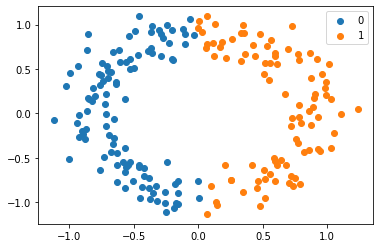

In [14]:
clf = LogisticRegression(random_state=0).fit(x_train, y_train)
clf.predict(x_test)
X= x_test
y = clf.predict(x_test)#(model_l.predict(x_test)>0.5)*1
# select indices of points with each class label
for i in range(2):
	samples_ix = where(y == i)
	pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
pyplot.legend()
pyplot.show()

# Comparacion K-fold

In [15]:
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

In [16]:
metricas_l=[]
metricas_fc=[]
skf = StratifiedKFold(n_splits=5)

for train_index, test_index in skf.split(X, y):
  x_train, x_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # Logistico
  model_l_fold = keras.Sequential([
      keras.layers.InputLayer(input_shape=(2)),                      
      keras.layers.Flatten(),
      keras.layers.Dense(1, activation='sigmoid')
  ])
  model_l_fold.compile(optimizer=keras.optimizers.SGD(lr=0.01),
                loss='binary_crossentropy',
                metrics=['accuracy'])

  model_l_fold.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=500,verbose=0)
  test_loss_l, test_acc_l = model_l_fold.evaluate(x=x_test,y= y_test, verbose=0)

  #FC
  model_fc_fold = keras.Sequential([
      keras.layers.InputLayer(input_shape=(2)),                      
      keras.layers.Flatten(),
      keras.layers.Dense(32, activation='relu'),
      keras.layers.Dense(1, activation='sigmoid')
  ])
  model_fc_fold.compile(optimizer=keras.optimizers.SGD(lr=0.01),
                loss='binary_crossentropy',
                metrics=['accuracy'])

  model_fc_fold.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=500,verbose=0)
  test_loss_fc, test_acc_fc = model_fc_fold.evaluate(x=x_test,y= y_test, verbose=0)

  #metricas
  metricas_l=metricas_l+[test_acc_l]
  metricas_fc=metricas_fc+[test_acc_fc]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [17]:
metricas_l

[0.5,
 0.4749999940395355,
 0.4300000071525574,
 0.4650000035762787,
 0.4699999988079071]

In [18]:
metricas_fc

[0.7850000262260437,
 0.8399999737739563,
 0.7799999713897705,
 0.8550000190734863,
 0.7649999856948853]